<a href="https://colab.research.google.com/github/shapirka/neur_265kaileyshapiro/blob/main/ABI_CellTypes_02_21_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining cell types by their electrophysiology

### The brain has thousands of different types of cells. How do we even begin to tease them apart?

We can define neurons by their <b>gene expression patterns</b>, <b>electrophysiology features</b>, and <b>structure</b>. Here, we'll use these features to compare and contrast cell types in the brain.

This notebook will help us investigate specific features in the electrophysiology dataset from the Allen Brain Atlas.

><b>Task:</b> Go to [The Allen Brain Institute Brain map homepage](http://celltypes.brain-map.org), scroll down to "Download Single Cell Data and Models", scroll to the section "Morphology and Electrophysiology", and click on the <span style = "color:blue"><u>Electrophysiology Page</u></span> link. This page shows you the electrophysiology data from one cell. Look at the "Mouse Line" category in the top left, and note gene name to the left of "-Cre". This is the marker gene for this cell - cells that express this gene also express tdTomato. Go to <span style = "color:blue"><u>https://www.ncbi.nlm.nih.gov/gene/</u></span> and type in the name of this gene. Read about this gene and what it does, and record two pieces of information about this gene in the *Markdown Cell* below

# Htr3a Gene Info:
* it enables identical protein binding
* involved in chemical synaptic transmission
* regulates membrane potential

## Step 1. Set up our coding environment
Whenever we start an analysis in Python, we need to be sure to import the necessary code packages. If you're running this notebook on Colab or Binder, the cells below will install packages into your coding environment -- we are *not* installing anything on your computer.

### Install the AllenSDK
The Allen Institute has compiled a set of code and tools called a **Software Development Kit** (SDK). These tools will help us import and analyze the cell types data. See [Technical Notes](#technical) at the end of this notebook for more information about working with the AllenSDK.

><b>Task</b>: Run the cell below, which will install the allensdk into your coding environment.

**Technical notes about installing the allensdk**
- If you're running this in Colab, you'll also be prompted to **Restart Runtime** after this is completed. Click the **Restart Runtime** button (nothing will happen), and then you're ready to proceed.
- If you receive an error or are running this notebook on your local computer, there are additional instructions on how to install the SDK locally <a href="http://alleninstitute.github.io/AllenSDK/install.html">here</a>.

In [1]:
# This will ensure that the AllenSDK is installed.
try:
    import allensdk
    print('allensdk imported')
except ImportError as e:
    !pip install allensdk

allensdk imported


><b>Task</b>: We also need to make sure that our coding environment has [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/) already installed. Run the cell below -- any packages that are missing will be installed for you.

In [2]:
# This will ensure that Numpy, Pandas, and Matplotlib are installed.
try:
    import numpy
    print('numpy already installed')
except ImportError as e:
    !pip install numpy
try:
    import pandas
    print('pandas already installed')
except ImportError as e:
    !pip install pandas
try:
    import matplotlib
    print('matplotlib already installed')
except ImportError as e:
    !pip install matplotlib

numpy already installed
pandas already installed
matplotlib already installed


### Import common packages
Below, we'll `import` a common selection of packages that will help us analyze and plot our data. We'll also configure the plotting in our notebook.

In [3]:
# Import our plotting package from matplotlib
import matplotlib.pyplot as plt

# Specify that all plots will happen inline & in high resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import pandas for working with databases
import pandas as pd

# Import numpy below
import numpy as np

# Add your print() statement below
print('Packages imported!')

Packages imported!


### Import the CellTypesModule from the allensdk
With the allensdk installed, we can `import` the **CellTypesCache module**.

The CellTypesCache that we're importing provides tools to allow us to get information from the cell types database. We're giving it a **manifest** filename as well. CellTypesCache will create this manifest file, which contains metadata about the cache. If you want, you can look in the cell_types folder in your code directory and take a look at the file.

><b>Task</b>: Run the cell below.

In [4]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('CellTypesCache imported.')

CellTypesCache imported.


## Step 2. Import data for a single cell

Now that we have the module that we need, let's import a raw sweep of the data. The cell below will grab the data for the same experiment you just looked at on the website. This data is in the form of a [**Neuroscience Without Borders** (NWB)](https://www.nwb.org/) file.

><b>Task</b>: Find the cell specimen ID for the first cell you looked at on the Allen Institute website (hint: it's in the URL), and assign this to <code>cell_id</code> below by replacing the <code>...</code>. Run the cell.

This might take a minute or two. You should wait until the circle in the upper right is <i>not</i> filled (Jupyter Notebook) or you have a green checkmark (Colab) to continue.

In [5]:
# Enter your cell_id below (last number digits at end of url from allen institue)
cell_id = 474626527

# Get the electrophysiology (ephys) data for that cell
data = ctc.get_ephys_data(cell_id)
print('Data retrieved')

2024-02-21 18:45:26,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491198297
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491198297


Data retrieved


Thankfully, our NWB file has some built-in **methods** to enable us to pull out a recording sweep. We can access methods of objects like our `data` object by adding a period, and then the method. That's what we're doing below, with `data.get_sweep()`.


><b>Task:</b> Choose your favorite sweep below. (<u>Hint</u>: go back to the website to see what the sweep numbers are.)
    
<i>Note</i>: You may get an `H5pyDeprecationWarning`, but don't worry about it. This is out of our control. :)

In [6]:
# Assign your favorite sweep number to a variable "sweep_number" below.
sweep_number = 26

sweep_data = data.get_sweep(sweep_number)
print('Sweep obtained')

Sweep obtained


## Step 3. Plot a raw sweep of data
Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot that data.

><b>Task:</b> Run the cell below!

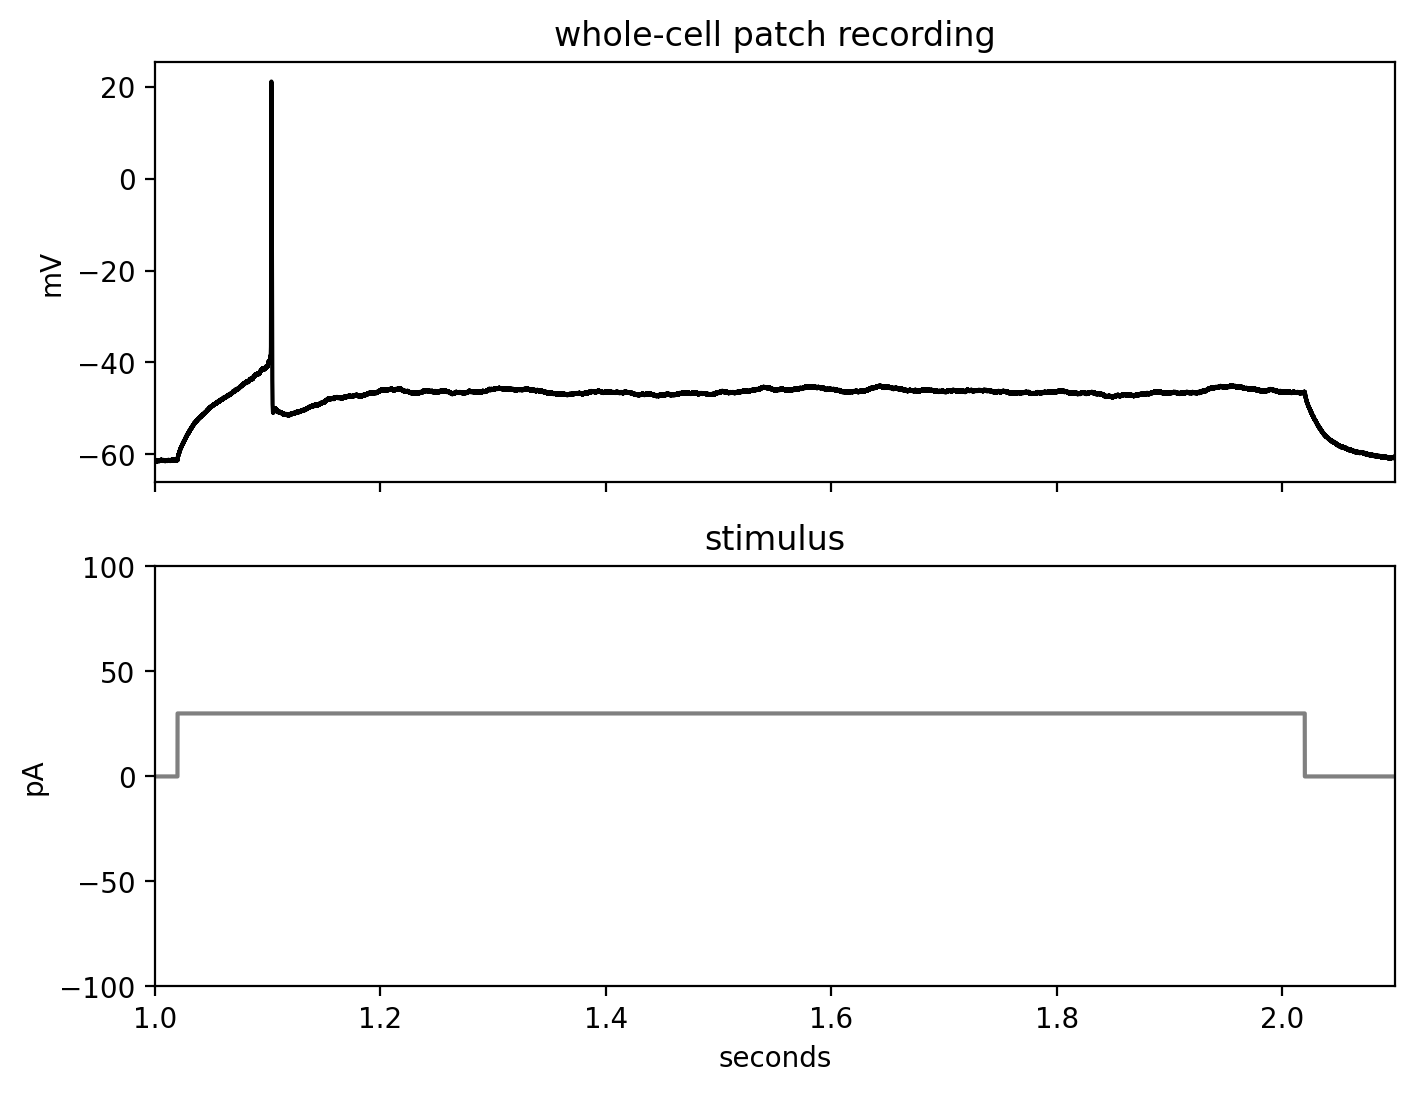

In [25]:
# Get the stimulus trace (in amps) and convert to pA
stim_current = sweep_data['stimulus'] * 1e12

# Get the voltage trace (in volts) and convert to mV
response_voltage = sweep_data['response'] * 1e3

# Get the sampling rate and can create a time axis for our data
sampling_rate = sweep_data['sampling_rate'] # in Hz
timestamps = (np.arange(0, len(response_voltage)) * (1.0 / sampling_rate))

# Set up our plot
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(8,6))

# axes 0 is our first plot, of the recorded voltage data
axes[0].plot(timestamps, response_voltage, color='black')
axes[0].set_ylabel('mV')
axes[0].set_xlim(0,1.2) # determines the scaling of the x-axis
axes[0].set_title('whole-cell patch recording')

# axes 1 is our second plot, of the stimulus trace
axes[1].plot(timestamps, stim_current, color='gray')
axes[1].set_ylabel('pA')
axes[1].set_xlabel('seconds')
axes[1].set_title('stimulus')
axes[1].set_xlim(1.0,2.1)
axes[1].set_ylim(-100,100)

plt.show()

This plot probably looks different from the plot on the website, why?

><b>Task:</b> There is a line that has been commented out above.
- Uncomment the line (remove the `#` in front of it) to change the scaling of the x-axis in order to zoom in on the period where the current was applied.
- You can change the values within the parentheses after <code>set_xlim</code> to change the extent of the x axis. There is more documentation about this method <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html">here</a>.
- Re-run the cell to re-plot the data.

## Step 4. Import data for a single cell, and plot its morphology

The Cell Types Database also contains **3D reconstructions** of neuronal morphologies. Here, we'll plot the reconstruction of our cell's morphology.

*Note*: It will take several minutes to run the cell below, possibly longer over a slow internet connection.

><b>Task</b>: Find the cell specimen ID for the first cell you looked at on the Allen Institute website (hint: it's in the URL), and assign this to <code>cell_id</code> below by replacing the <code>...</code>. Run the cell.

2024-02-21 18:59:27,622 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491120375
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491120375
2024-02-21 18:59:29,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/501275935
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/501275935


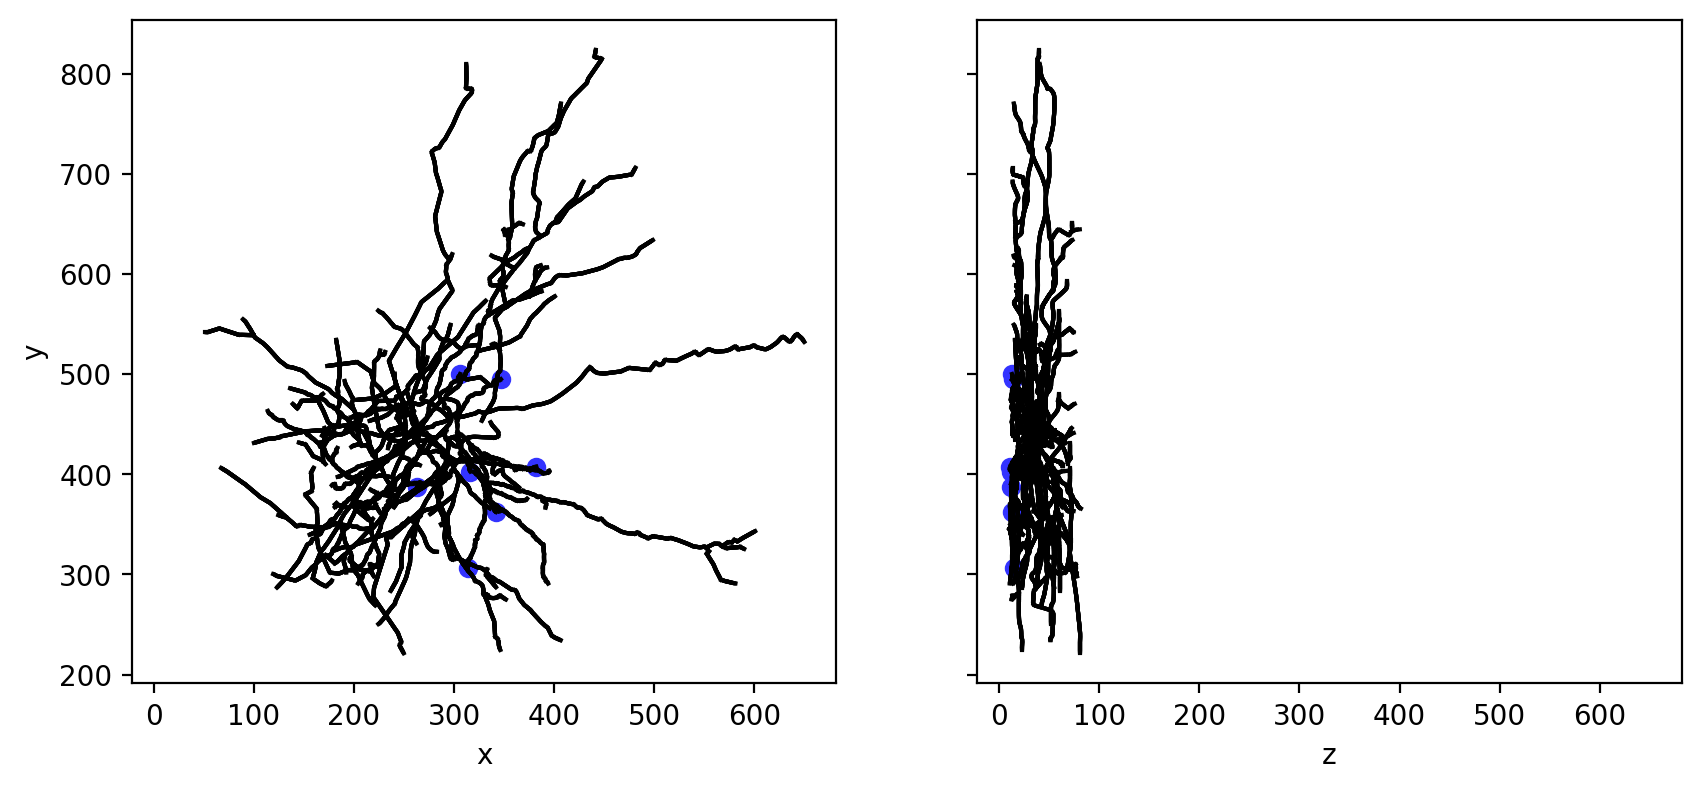

In [26]:
# Enter your cell_id below
cell_id = 474626527

# Import necessary toolbox
from allensdk.core.swc import Marker

# Download and open morphology and marker files
morphology = ctc.get_reconstruction(cell_id)
markers = ctc.get_reconstruction_markers(cell_id)

# Set up our plot
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,10))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Make a line drawing of x-y and y-z views
for n in morphology.compartment_list:
    for c in morphology.children_of(n):
        axes[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        axes[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')

# cut dendrite markers
dm = [ m for m in markers if m['name'] == Marker.CUT_DENDRITE ]
axes[0].scatter([m['x'] for m in dm], [m['y'] for m in dm], color='#3333ff')
axes[1].scatter([m['z'] for m in dm], [m['y'] for m in dm], color='#3333ff')

# no reconstruction markers
nm = [ m for m in markers if m['name'] == Marker.NO_RECONSTRUCTION ]
axes[0].scatter([m['x'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[1].scatter([m['z'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel('z')
plt.show()

## Step 5. Analyze pre-computed features

The Cell Types Database contains a set of features that have already been computed, which could serve as good starting points for analysis. We can query the database to get these features. Below, we'll use the Pandas package that we imported above to create a **dataframe** for our data.

><b>Task</b>: Run the cell below. It'll take ~10 seconds. It will print a list of all of the feature available, as well as produce a dataframe, which looks something like an excel spreadsheet. You can scroll to the right to see many of the different features available in this dataset.

In [27]:
# Download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
ef_df = pd.DataFrame(ephys_features).set_index('specimen_id')

print('Ephys features available for %d cells:' % len(ef_df))
ef_df.head() # Just show the first 5 rows (the head) of our dataframe

Ephys features available for 2333 cells:


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


As you can see in the dataframe above, there are many **pre-computed features** available in this dataset. [Here's a glossary](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit?usp=sharing), in case you're curious.

![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)

Image from the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Institute Cell Types Database Technical Whitepaper.</a>
<br><br>
Let's first look at the speed of the trough, and the ratio between the upstroke and downstroke of the action potential.

- <b>Action potential fast trough</b>(<code>fast_trough_v_long_square</code>): Minimum value of the membrane potential in the interval lasting 5 ms after the peak.
- <b>Upstroke/downstroke ratio</b> (<code>upstroke_downstroke_ratio_long_square</code>): The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke.

Below, we'll plot the values of the trough vs. the upstroke-downstroke ratio in a scatterplot.

><b>Task</b>: Run the cell below.

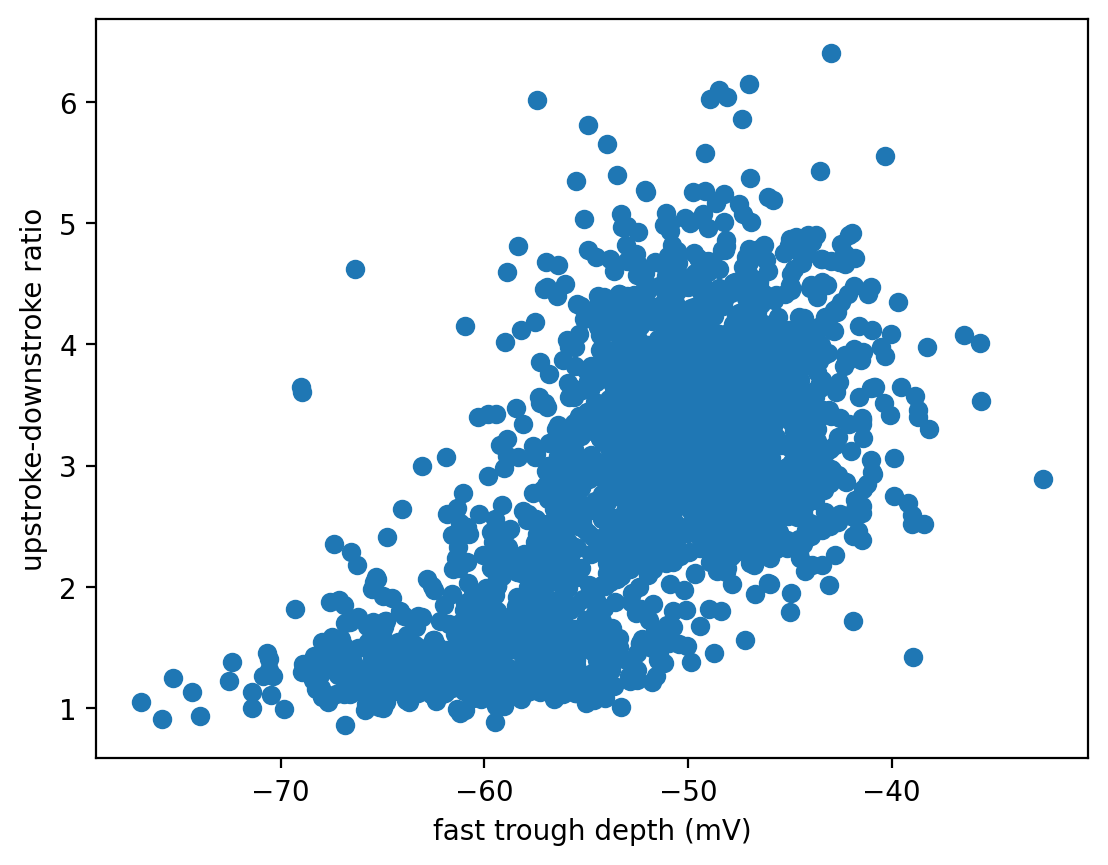

In [28]:
plt.scatter(ef_df['fast_trough_v_long_square'],
            ef_df['upstroke_downstroke_ratio_long_square'])
plt.ylabel("upstroke-downstroke ratio")
plt.xlabel("fast trough depth (mV)")
plt.show()

It looks like there may be roughly two clusters in the data above. Maybe they relate to whether the cells are presumably excitatory (spiny) cells or inhibitory (aspiny) cells. Let's query the API and split up the two sets to see.

><b>Task:</b> The cell below will dig up the dendrite type of these cells and add that to our dataframe. Then, it'll create our same scatterplot, where each dot is colored by dendrite type. All you need to do is run the cell! Right click to save the image as 'scatterplot.png' once it generates.

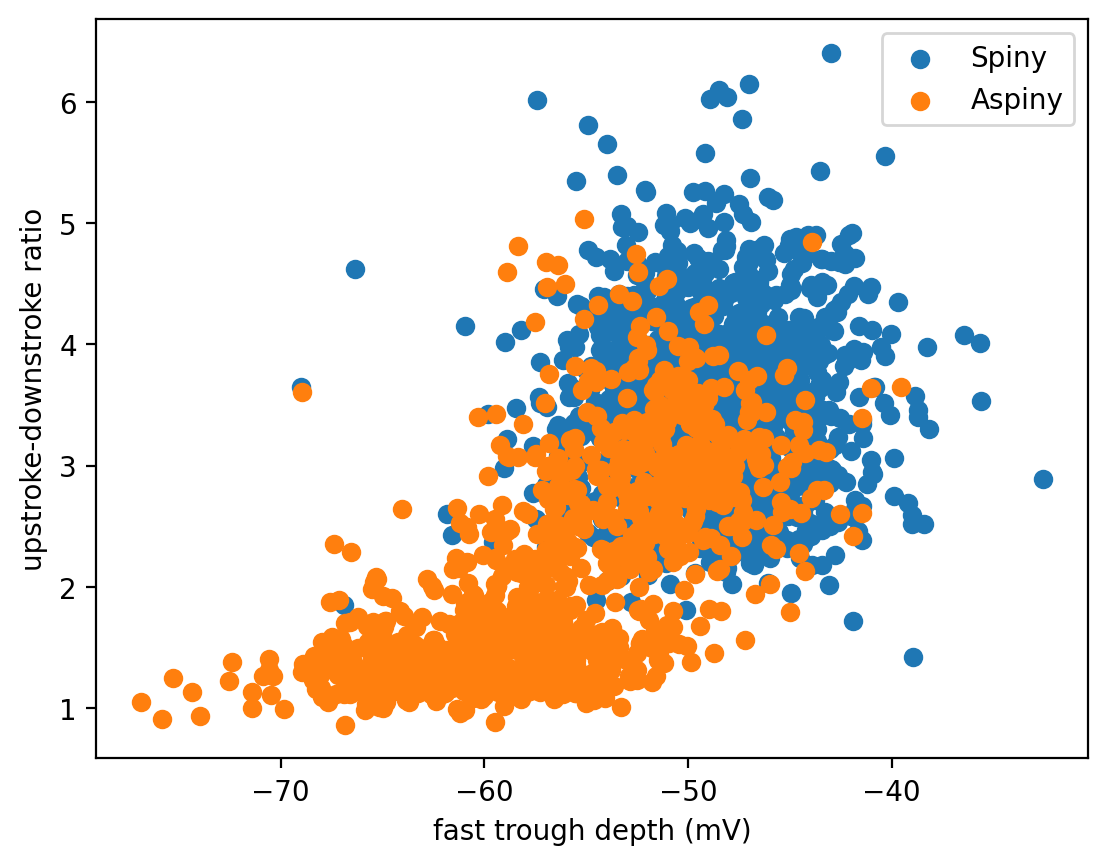

In [29]:
# Get information about our cells' dendrites
cells = ctc.get_cells()
full_dataframe = ef_df.join(pd.DataFrame(cells).set_index('id'))

# Create a dataframe for spiny cells, and a dataframe for aspiny cells
spiny_df = full_dataframe[full_dataframe['dendrite_type'] == 'spiny']
aspiny_df = full_dataframe[full_dataframe['dendrite_type'] == 'aspiny']

# Create our plot! Calling scatter twice like this will draw both of these on the same plot.
plt.scatter(spiny_df['fast_trough_v_long_square'],spiny_df['upstroke_downstroke_ratio_long_square'])
plt.scatter(aspiny_df['fast_trough_v_long_square'],aspiny_df['upstroke_downstroke_ratio_long_square'])

plt.ylabel('upstroke-downstroke ratio')
plt.xlabel('fast trough depth (mV)')
plt.legend(['Spiny','Aspiny'])

plt.show()

Looks like these two clusters do partially relate to the dendritic type. Cells with spiny dendrites (which are typically excitatory cells) have a big ratio of upstroke:downstroke, and a more shallow trough (less negative). Cells with aspiny dendrites (typically inhibitory cells) are a little bit more varied. But </i>only</i> aspiny cells have a low upstroke:downstroke ratio and a deeper trough (more negative).

* small ratio means they are more uneven on the upstroke-downstroke ratio --> which is found more in aspiny/inhibitory cells

## Step 6. Compare waveforms
Let's take a closer look at the action potentials of these cells to see what these metrics actually mean for the action potential waveform by choosing one of the cells with the highest upstroke:downstroke ratio.

><b>Task</b>: Run the cell below. The first line will sort our dataframe so that it's descending (<code>ascending=False</code>) based on upstroke:downstroke ratio. This is an example of a **boolean** in Python. You can change this to say `ascending=True` if you want to sort with *lowest* ratio at the top.

In [41]:
# Sort the dataframe and reassign
ef_df_upstroke_sorted = ef_df.sort_values('upstroke_downstroke_ratio_long_square',ascending=True)

# Assign one of the top cells in our dataframe (default = 2) and the ratio to different variables
specimen_id = ef_df_upstroke_sorted.index[2]
ratio = ef_df_upstroke_sorted.iloc[2]['upstroke_downstroke_ratio_long_square']

# Print our results so that we can see them
print('Specimen ID: ' + str(specimen_id) + ' with upstroke-downstroke ratio: ' + str(ratio))

Specimen ID: 569991910 with upstroke-downstroke ratio: 0.906845223777635


Now we can take a closer look at the action potential for that cell by grabbing a raw sweep of recording from it, just like we did above.

><b>Task:</b> Run the cell below. This may take a minute or so.

In [42]:
# Get the data for our specimen
upstroke_data = ctc.get_ephys_data(specimen_id)

# Get one sweep for our specimen (I've already handselected a gorgeous one for you, 45)
upstroke_sweep = upstroke_data.get_sweep(45)

# Get the current & voltage traces
current = upstroke_sweep['stimulus'] * 1e12 # in A, converted to pA
voltage = upstroke_sweep['response'] * 1e3 # converted to mV!

# Get the time stamps for our voltage trace
timestamps = (np.arange(0, len(voltage)) * (1.0 / upstroke_sweep['sampling_rate']))

print('Sweep obtained')

2024-02-21 19:19:17,824 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/652561005
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/652561005


Sweep obtained


And now let's plot our sweep. You may need to change some values in the plotting script to actually zoom in on the action potential, or change the sweep number (set to 45 by default) to one where you can see an action potential.

><b>Task</b>: Modify the plotting script below so that you can actually see the shape of the action potential, and then run.

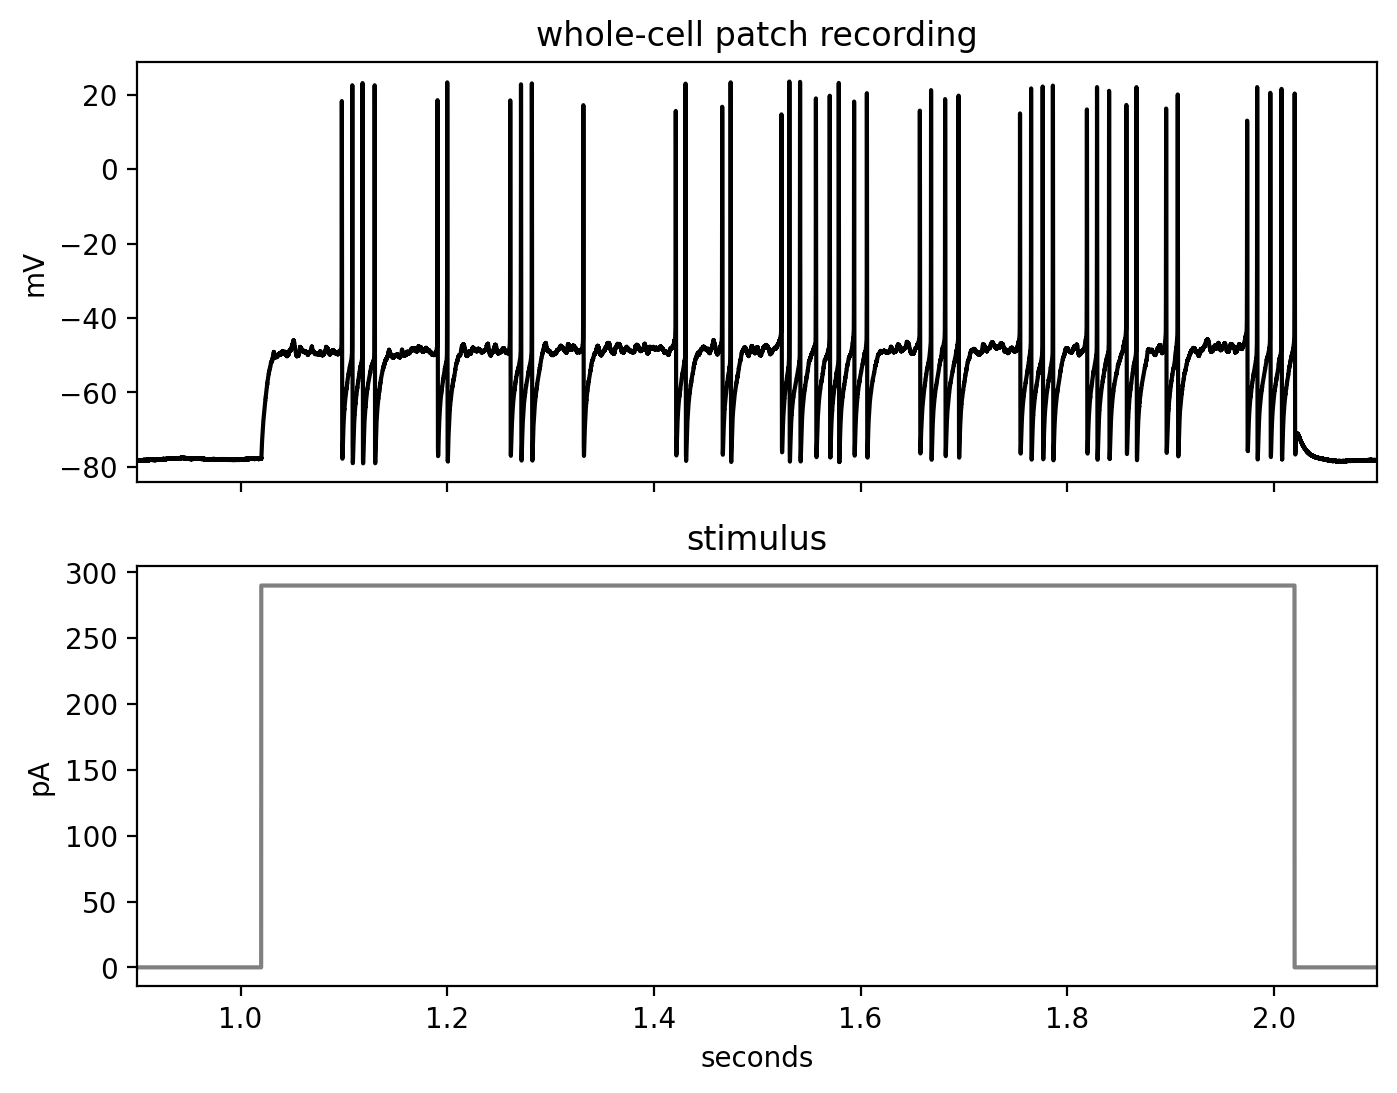

In [44]:
fig, axes = plt.subplots(2,1,figsize=(8,6),sharex=True)

# axes 0 is our first plot, of the recorded voltage data
axes[0].plot(timestamps, voltage, color='black')
axes[0].set_ylabel('mV')
axes[0].set_title('whole-cell patch recording')
axes[0].set_xlim(.9,2.1)


#axes 1 is our second plot, of the stimulus trace
axes[1].plot(timestamps, current, color='gray')
axes[1].set_ylabel('pA')
axes[1].set_xlabel('seconds')
axes[1].set_title('stimulus')

plt.show()

Let's do the same thing for a cell with a low upstroke ratio and compare.

><b>Task:</b> Edit the line several blocks above that assigns the variable <code>ef_df_upstroke_sorted</code>. Where it says <code>ascending=</code>, set it to <code>True</code>, instead of <code>False</code>. Once you do that, re-run that cell and the cells below to re-plot the data for a new cell with a <i>low</i> upstroke-downstroke ratio. Right click to save your image as 'low_upstrokeratio.png' when you're done.

As you can see, even that one metric, upstroke:downstroke ratio, means the shape of the action potential is dramatically different. The other metric above, size of the trough, is highly correlated with upstroke:downstroke. You can see that by comparing the two cells here. Cells with high upstroke:downstroke tend to have less negative troughs (undershoots) after the action potential.